# COGS 118B - Data Wrangling

# Names


- Ana Maria Baboescu
- Bradley Grace
- Fatima Enriquez
- Ngoc (Lucy) Giang
- Stephanie Frianeza

# Imported Libraries
Feel free to add any necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

# FMA
Below code displays the updated dataset with the wanted variables

In [37]:
# https://github.com/mdeff/fma

# Import dataframes from CSV files
#fma_tracks = pd.read_csv('datasets/fma/tracks.csv') # per track metadata such as ID, title, artist, genres, tags and play counts, for all 106,574 tracks.
fma_genres = pd.read_csv('datasets/fma/genres.csv') # all 163 genres with name and parent
#fma_features1 = pd.read_csv('datasets/fma/features.csv') # common features extracted with librosa
fma_features2 = pd.read_csv('datasets/fma/echonest.csv') # audio features provided by Echonest (now Spotify)

#fma_tracks.shape, 
fma_genres.shape, 
#fma_features1.shape, 
fma_features2.shape



(13132, 250)

In [38]:
# Import the split dataset CSVs 

fma_tracks1 = pd.read_csv('datasets/fma/tracks-1.csv')
fma_tracks2 = pd.read_csv('datasets/fma/tracks-2.csv')
fma_tracks3 = pd.read_csv('datasets/fma/tracks-3.csv')
fma_tracks4 = pd.read_csv('datasets/fma/tracks-4.csv')
fma_tracks5 = pd.read_csv('datasets/fma/tracks-5.csv')
fma_tracks6 = pd.read_csv('datasets/fma/tracks-6.csv')

fma_tracks = pd.concat([fma_tracks1, fma_tracks2, fma_tracks3, fma_tracks4, fma_tracks5, fma_tracks6], ignore_index=True)

fma_features1_1 = pd.read_csv('datasets/fma/features-1.csv')
fma_features1_2 = pd.read_csv('datasets/fma/features-2.csv')
fma_features1_3 = pd.read_csv('datasets/fma/features-3.csv')
fma_features1_4 = pd.read_csv('datasets/fma/features-4.csv')
fma_features1_5 = pd.read_csv('datasets/fma/features-5.csv')
fma_features1_6 = pd.read_csv('datasets/fma/features-6.csv')
fma_features1_7 = pd.read_csv('datasets/fma/features-7.csv')
fma_features1_8 = pd.read_csv('datasets/fma/features-8.csv')
fma_features1_9 = pd.read_csv('datasets/fma/features-9.csv')
fma_features1_10 = pd.read_csv('datasets/fma/features-10.csv')
fma_features1_11 = pd.read_csv('datasets/fma/features-11.csv')
fma_features1_12 = pd.read_csv('datasets/fma/features-12.csv')
fma_features1_13 = pd.read_csv('datasets/fma/features-13.csv')
fma_features1_14 = pd.read_csv('datasets/fma/features-14.csv')
fma_features1_15 = pd.read_csv('datasets/fma/features-15.csv')
fma_features1_16 = pd.read_csv('datasets/fma/features-16.csv')
fma_features1_17 = pd.read_csv('datasets/fma/features-17.csv')
fma_features1_18 = pd.read_csv('datasets/fma/features-18.csv')
fma_features1_19 = pd.read_csv('datasets/fma/features-19.csv')
fma_features1_20 = pd.read_csv('datasets/fma/features-20.csv')
fma_features1_21 = pd.read_csv('datasets/fma/features-21.csv')

fma_features1 = pd.concat([fma_features1_1, fma_features1_2, fma_features1_3, fma_features1_4, fma_features1_5, fma_features1_6, fma_features1_7, fma_features1_8, fma_features1_9, fma_features1_10, fma_features1_11, fma_features1_12, fma_features1_13, fma_features1_14, fma_features1_15, fma_features1_16, fma_features1_17, fma_features1_18, fma_features1_19, fma_features1_20, fma_features1_21], ignore_index=True)


In [39]:
# 12 = artist names
fma_artist_names = fma_tracks['artist.12']


In [40]:
fma_track_titles = fma_tracks['track.19']
fma_track_titles

0                                             title
1                                               NaN
2                                              Food
3                                      Electric Ave
4                                        This World
                            ...                    
106571                                    The Auger
106572                              Let's Skin Ruby
106573           My House Smells Like Kim Deal/Pulp
106574                      The Man With Two Mouths
106575    Another Trick Up My Sleeve (Instrumental)
Name: track.19, Length: 106576, dtype: object

In [41]:
fma_album_titles = fma_tracks['album.10']
fma_album_titles

0                                 title
1                                   NaN
2                  AWOL - A Way Of Life
3                  AWOL - A Way Of Life
4                  AWOL - A Way Of Life
                      ...              
106571    Live at Monty Hall, 2/17/2017
106572    Live at Monty Hall, 2/17/2017
106573    Live at Monty Hall, 2/17/2017
106574    Live at Monty Hall, 2/17/2017
106575        What I Tell Myself Vol. 2
Name: album.10, Length: 106576, dtype: object

In [42]:
fma_album_types = fma_tracks['album.12']
fma_album_types

0                     type
1                      NaN
2                    Album
3                    Album
4                    Album
                ...       
106571    Live Performance
106572    Live Performance
106573    Live Performance
106574    Live Performance
106575               Album
Name: album.12, Length: 106576, dtype: object

In [43]:
fma_features2.head()

fma_danceability = fma_features2['echonest.1']
fma_energy = fma_features2['echonest.2']
#fma_loudness = fma_features2['echonest.']
fma_speechiness = fma_features2['echonest.5']
fma_acousticness = fma_features2['echonest']
fma_instrumentalness = fma_features2['echonest.3']
fma_liveness = fma_features2['echonest.4']

In [44]:
# merge datasets. 

# use Title + Artist as the key.
#df_top_500["Title,Artist"] = df_top_500["Title"] + "*\*" + df_top_500["Artist"]
# Title*/*Artist is the key

# loop through each row, add to new dataset if key not already present. 
fma_artist_names
fma_track_titles
fma_album_titles
fma_album_types
fma_danceability
fma_energy
fma_speechiness
fma_acousticness
fma_instrumentalness
fma_liveness

# truncate the first two rows (NaN, etc.)
fma_artist_names = fma_artist_names[2:]
fma_track_titles = fma_track_titles[2:]
fma_album_titles = fma_album_titles[2:]
fma_album_types = fma_album_types[2:]
fma_danceability = fma_danceability[2:]
fma_energy = fma_energy[2:]
fma_speechiness = fma_speechiness[2:]
fma_acousticness = fma_acousticness[2:]
fma_instrumentalness = fma_instrumentalness[2:]
fma_liveness = fma_liveness[2:]


fma_artist_names.head()


2          AWOL
3          AWOL
4          AWOL
5     Kurt Vile
6    Nicky Cook
Name: artist.12, dtype: object

In [45]:
fma_artist_names = fma_artist_names.reset_index(drop=True)
fma_track_titles = fma_track_titles.reset_index(drop=True)
fma_album_titles = fma_album_titles.reset_index(drop=True)
fma_album_types = fma_album_types.reset_index(drop=True)
fma_danceability = fma_danceability.reset_index(drop=True)
fma_energy = fma_energy.reset_index(drop=True)
fma_speechiness = fma_speechiness.reset_index(drop=True)
fma_acousticness = fma_acousticness.reset_index(drop=True)
fma_instrumentalness = fma_instrumentalness.reset_index(drop=True)
fma_liveness = fma_liveness.reset_index(drop=True)

fma_artist_names.head()

0          AWOL
1          AWOL
2          AWOL
3     Kurt Vile
4    Nicky Cook
Name: artist.12, dtype: object

In [46]:
# create a dataframe that that combines all of the fma_ dataframes.
fma = pd.DataFrame()
fma = fma.assign(artist_names = fma_artist_names)
fma = fma.assign(track_titles = fma_track_titles)
fma = fma.assign(album_titles = fma_album_titles)
fma = fma.assign(album_types = fma_album_types)
fma = fma.assign(danceability = fma_danceability)
fma = fma.assign(energy = fma_energy)
fma = fma.assign(speechiness = fma_speechiness)
fma = fma.assign(acousticness = fma_acousticness)
fma = fma.assign(instrumentalness = fma_instrumentalness)
fma = fma.assign(liveness = fma_liveness)

# create a new column for the key (Title*/*Artist)
fma.insert(0, 'Title*\*Artist', fma_track_titles + "*\*" + fma_artist_names)

fma.head()

,Title*\*Artist,artist_names,track_titles,album_titles,album_types,danceability,energy,speechiness,acousticness,instrumentalness,liveness
0,Food*\*AWOL,AWOL,Food,AWOL - A Way Of Life,Album,NaN,NaN,NaN,NaN,NaN,NaN
1,Electric Ave*\*AWOL,AWOL,Electric Ave,AWOL - A Way Of Life,Album,0.6758939853,0.6344762684,0.1593100648,0.4166752327,0.0106280683,0.1776465712
2,This World*\*AWOL,AWOL,This World,AWOL - A Way Of Life,Album,0.5286430621,0.8174611317,0.4618181276,0.3744077685,0.0018511032,0.1058799438
3,Freeway*\*Kurt Vile,Kurt Vile,Freeway,Constant Hitmaker,Album,0.7455658702,0.7014699916,0.1245953419,0.0435668989,0.0006967990,0.3731433124
4,Spiritual Level*\*Nicky Cook,Nicky Cook,Spiritual Level,Niris,Album,0.6581786543,0.9245251615,0.0329852191,0.9516699648,0.9654270154,0.1154738842


In [47]:
#universal_columns = ["Title*\*Artist", "Artist", "Title", "Album", "Album Type", "Danceability", "Loudness", "Speechiness", "Acousticness", "Instrumentalness"]

fma_columns = ["Title*\*Artist", "Artist", "Title", "Album", "Album Type", "Danceability", "Energy", "Speechiness", "Acousticness", "Instrumentalness", "Liveness"]

# create empty Loudness column with NaN values, for easier merging
#fma = fma.assign(Loudness = np.nan)

# print columns of fma
print(fma.columns)
# count number of columns
print(len(fma.columns))
print(len(fma_columns))

# rename columns (except ignore Loudness as this dataset does not contain it)
fma.columns = fma_columns

fma.head()

Index(['Title*\*Artist', 'artist_names', 'track_titles', 'album_titles',
       'album_types', 'danceability', 'energy', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness'],
      dtype='object')
11
11


,Title*\*Artist,Artist,Title,Album,Album Type,Danceability,Energy,Speechiness,Acousticness,Instrumentalness,Liveness
0,Food*\*AWOL,AWOL,Food,AWOL - A Way Of Life,Album,NaN,NaN,NaN,NaN,NaN,NaN
1,Electric Ave*\*AWOL,AWOL,Electric Ave,AWOL - A Way Of Life,Album,0.6758939853,0.6344762684,0.1593100648,0.4166752327,0.0106280683,0.1776465712
2,This World*\*AWOL,AWOL,This World,AWOL - A Way Of Life,Album,0.5286430621,0.8174611317,0.4618181276,0.3744077685,0.0018511032,0.1058799438
3,Freeway*\*Kurt Vile,Kurt Vile,Freeway,Constant Hitmaker,Album,0.7455658702,0.7014699916,0.1245953419,0.0435668989,0.0006967990,0.3731433124
4,Spiritual Level*\*Nicky Cook,Nicky Cook,Spiritual Level,Niris,Album,0.6581786543,0.9245251615,0.0329852191,0.9516699648,0.9654270154,0.1154738842


# Spotify
Below code displays the updated dataset with the wanted variables

In [48]:
headers = ["Artist", "Track", "Album", "Album_type", "Danceability", "Energy", "Loudness","Speechiness","Acousticness","Instrumentalness","Liveness","Valence","Tempo","Duration_min","Title","Channel","Views","Likes","Comments","Licensed","official_video","Stream","EnergyLiveness","most_playedon"]
spotify_data = pd.read_csv('datasets/cleaned_dataset.csv', header = None, names = headers, skiprows=1,)
spotify_data.head()

selected_columns = ["Artist", "Track", "Album", "Album_type", "Danceability", "Loudness", "Speechiness", "Acousticness", "Instrumentalness"]
spotify_data = spotify_data[selected_columns]

spotify_data.rename(columns={'Album_type': 'Album Type'}, inplace=True)
spotify_data.rename(columns={'Track': 'Title'}, inplace=True)

spotify_data['Title*\*Artist'] = spotify_data.apply(lambda row: row['Artist'] + '*\*' + row['Title'], axis=1)

# dropping the 'Artist' and 'Track' columns
#spotify_data.drop(columns=['Artist', 'Title'], inplace=True)

cols = spotify_data.columns.tolist()
cols = ['Title*\*Artist'] + [col for col in cols if col != 'Title*\*Artist']
spotify_data = spotify_data[cols]

# preview
spotify_data

,Title*\*Artist,Artist,Title,Album,Album Type,Danceability,Loudness,Speechiness,Acousticness,Instrumentalness
0,Gorillaz*\*Feel Good Inc.,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,-6.679,0.1770,0.008360,0.002330
1,Gorillaz*\*Rhinestone Eyes,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,-5.815,0.0302,0.086900,0.000687
2,Gorillaz*\*New Gold (feat. Tame Impala and Boo...,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,-3.930,0.0522,0.042500,0.046900
3,Gorillaz*\*On Melancholy Hill,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,-5.810,0.0260,0.000015,0.509000
4,Gorillaz*\*Clint Eastwood,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,-8.627,0.1710,0.025300,0.000000
...,...,...,...,...,...,...,...,...,...,...
20589,SICK LEGEND*\*JUST DANCE HARDSTYLE,SICK LEGEND,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,0.582,-6.344,0.0328,0.448000,0.000000
20590,SICK LEGEND*\*SET FIRE TO THE RAIN HARDSTYLE,SICK LEGEND,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,0.531,-1.786,0.1370,0.028000,0.000000
20591,SICK LEGEND*\*OUTSIDE HARDSTYLE SPED UP,SICK LEGEND,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,0.443,-4.679,0.0647,0.024300,0.000000
20592,SICK LEGEND*\*ONLY GIRL HARDSTYLE,SICK LEGEND,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,single,0.417,-4.004,0.4190,0.356000,0.018400


In [49]:
#check what data types we have in the dataset
print(spotify_data.dtypes)

#check for any null values
spotify_data[spotify_data.isnull().any(axis=1)]

# export file
# spotify_data.to_csv('spotify_data2.csv', index=False)

# no duplicates
spotify_data.drop_duplicates("Title*\*Artist") # no duplicates
spotify_data

Title*\*Artist       object
Artist               object
Title                object
Album                object
Album Type           object
Danceability        float64
Loudness            float64
Speechiness         float64
Acousticness        float64
Instrumentalness    float64
dtype: object


,Title*\*Artist,Artist,Title,Album,Album Type,Danceability,Loudness,Speechiness,Acousticness,Instrumentalness
0,Gorillaz*\*Feel Good Inc.,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,-6.679,0.1770,0.008360,0.002330
1,Gorillaz*\*Rhinestone Eyes,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,-5.815,0.0302,0.086900,0.000687
2,Gorillaz*\*New Gold (feat. Tame Impala and Boo...,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,-3.930,0.0522,0.042500,0.046900
3,Gorillaz*\*On Melancholy Hill,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,-5.810,0.0260,0.000015,0.509000
4,Gorillaz*\*Clint Eastwood,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,-8.627,0.1710,0.025300,0.000000
...,...,...,...,...,...,...,...,...,...,...
20589,SICK LEGEND*\*JUST DANCE HARDSTYLE,SICK LEGEND,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,0.582,-6.344,0.0328,0.448000,0.000000
20590,SICK LEGEND*\*SET FIRE TO THE RAIN HARDSTYLE,SICK LEGEND,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,0.531,-1.786,0.1370,0.028000,0.000000
20591,SICK LEGEND*\*OUTSIDE HARDSTYLE SPED UP,SICK LEGEND,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,0.443,-4.679,0.0647,0.024300,0.000000
20592,SICK LEGEND*\*ONLY GIRL HARDSTYLE,SICK LEGEND,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,single,0.417,-4.004,0.4190,0.356000,0.018400


# 500 Greatest Songs of All Time
Below code displays the updated dataset with the wanted variables


In [50]:
df_top_500 = pd.read_csv('datasets/Top 500 Songs.csv',encoding='Latin 1')
df_top_500 = df_top_500[["title", "description", "artist"]] 
df_top_500.isnull().sum().sum() #no missing values (yay!) 
df_top_500 = df_top_500.rename(columns={"artist": "Artist", "description" : "Description", "title" : "Title"})
df_top_500["Title*\*Artist"] = df_top_500["Title"] + "*\*" + df_top_500["Artist"]
df_top_500

,Title,Description,Artist,Title*\*Artist
0,Like a Rolling Stone,"""I wrote it. I didn't fail. It was straight,"" ...",Bob Dylan,Like a Rolling Stone*\*Bob Dylan
1,(I Can't Get No) Satisfaction',"""It's the riff heard round the world,"" says St...",The Rolling Stones,(I Can't Get No) Satisfaction'*\*The Rolling S...
2,Imagine,"John Lennon wrote ""Imagine,"" his greatest musi...",John Lennon,Imagine*\*John Lennon
3,What's Going On,"""What's Going On"" is an exquisite plea for pea...",Marvin Gaye,What's Going On*\*Marvin Gaye
4,Respect,"Otis Redding wrote ""Respect"" and recorded it f...",Aretha Franklin,Respect*\*Aretha Franklin
...,...,...,...,...
495,Heroin,"This seven-minute, two-chord track spiked out ...",The Velvet Underground,Heroin*\*The Velvet Underground
496,Leader of the Pack,Morton found the inspiration for this song at ...,The Shangri-Las,Leader of the Pack*\*The Shangri-Las
497,Pressure Drop,Toots and the Maytals were already reggae star...,Toots and the Maytals,Pressure Drop*\*Toots and the Maytals
498,Come As You Are,"""It's just about people and what they're expec...",Nirvana,Come As You Are*\*Nirvana


# Prediction of Music Genre
Below code displays the updated dataset with the wanted variables


In [51]:
pred_Music = pd.read_csv('datasets/music_genre.csv')

#subset with wanted variables
edited_pred_Music = pred_Music[["artist_name", "track_name", "acousticness", "danceability", 
                                "instrumentalness", "liveness", "loudness", "mode", "speechiness", 
                                "tempo", "valence", "music_genre"]]

#checked and got rid of duplicates
edited_pred_Music = edited_pred_Music.drop_duplicates('track_name').copy()


#changed name in columns artist_name and track_name and combined columns
new_name_edited_pred_Music = edited_pred_Music.rename(columns={
    "artist_name" : "Artist", 
    "track_name" : "Title",
    "music_genre" : "Genre",
    "acousticness" : "Acousticness",
    "danceability" : "Danceability",
    "instrumentalness" : "Instrumentalness",
    "liveness" : "Liveness",
    "loudness" : "Loudness",
    "mode" : "Mode",
    "speechiness" : "Speechiness",
    "tempo" : "Tempo",
    "valence" : "Valence"
    })
#new_name_edited_pred_Music["Title*\*Artist"] = new_name_edited_pred_Music["Title"] + "*\*" + new_name_edited_pred_Music["Artist"]
new_name_edited_pred_Music.insert(0, 'Title*\*Artist', new_name_edited_pred_Music["Title"] + "*\*" + new_name_edited_pred_Music["Artist"]) # replaced above line for index 0 insertion - Bradley
new_name_edited_pred_Music


,Title*\*Artist,Artist,Title,Acousticness,Danceability,Instrumentalness,Liveness,Loudness,Mode,Speechiness,Tempo,Valence,Genre
0,Röyksopp's Night Out*\*Röyksopp,Röyksopp,Röyksopp's Night Out,0.00468,0.652,0.792000,0.115,-5.201,Minor,0.0748,100.889,0.759,Electronic
1,The Shining Path*\*Thievery Corporation,Thievery Corporation,The Shining Path,0.01270,0.622,0.950000,0.124,-7.043,Minor,0.0300,115.00200000000001,0.531,Electronic
2,Hurricane*\*Dillon Francis,Dillon Francis,Hurricane,0.00306,0.620,0.011800,0.534,-4.617,Major,0.0345,127.994,0.333,Electronic
3,Nitro*\*Dubloadz,Dubloadz,Nitro,0.02540,0.774,0.002530,0.157,-4.498,Major,0.2390,128.014,0.270,Electronic
4,Divide & Conquer*\*What So Not,What So Not,Divide & Conquer,0.00465,0.638,0.909000,0.157,-6.266,Major,0.0413,145.036,0.323,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,So Good at Being in Trouble*\*Unknown Mortal O...,Unknown Mortal Orchestra,So Good at Being in Trouble,0.03630,0.829,0.878000,0.119,-10.136,Major,0.0515,103.816,0.594,Hip-Hop
49999,Barbie Doll*\*Night Lovell,Night Lovell,Barbie Doll,0.13300,0.849,0.000008,0.296,-7.195,Major,0.0516,99.988,0.629,Hip-Hop
50001,Drama (feat. Drake)*\*Roy Woods,Roy Woods,Drama (feat. Drake),0.15700,0.709,0.000000,0.109,-9.814,Major,0.0550,122.04299999999999,0.113,Hip-Hop
50002,Lovin' Me (feat. Smiggz)*\*Berner,Berner,Lovin' Me (feat. Smiggz),0.00597,0.693,0.000000,0.143,-5.443,Major,0.1460,131.079,0.395,Hip-Hop


cluster_label
7    8968
5    7977
8    7597
4    6578
2    6478
6    2291
0     972
1     765
3      74
Name: count, dtype: int64


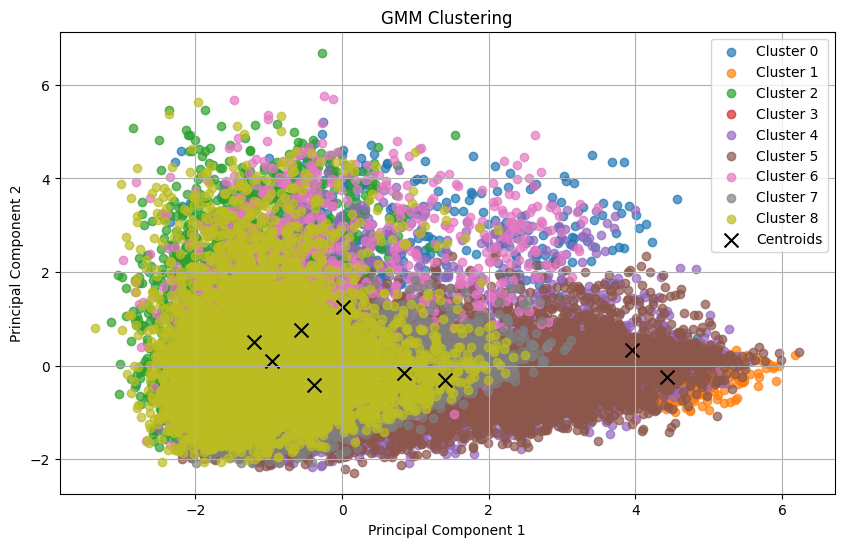

In [52]:
#Show the Clustering 

# Drop non-numeric columns
X = edited_pred_Music.drop(columns=['artist_name', 'track_name', 'music_genre'])

#Define categorical and numerical features
numeric_features = X.select_dtypes(include=['float64']).columns.tolist()
categorical_features = ['mode']

#Define transformers for categorical & numerical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy = 'mean')), 
    ('scaler', StandardScaler())
])


categorical_transformer = Pipeline(steps= [
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

#apply transformers to appropriate columns via ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features), 
        ('cat', categorical_transformer, categorical_features)
    ])

#preprocess the data
X_processed = preprocessor.fit_transform(X)


#Fit GMM
n_components = 9
gmm = GaussianMixture(n_components=n_components, random_state = 42)
gmm.fit(X_processed)

#get cluster labels
cluster_labels = gmm.predict(X_processed)

#add cluster labels to orig. dataframe
edited_pred_Music['cluster_label'] = cluster_labels

print(edited_pred_Music['cluster_label'].value_counts())

#reduce dimensionality for purposes of visualizing data
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_processed)

#plot data with cluster labels
plt.figure(figsize=(10,6))
for cluster_label in range(n_components):
    plt.scatter(X_reduced[cluster_labels == cluster_label, 0],
               X_reduced[cluster_labels == cluster_label, 1],
               label=f'Cluster {cluster_label}', alpha=0.7)

#plot centroids
centroids = pca.transform(gmm.means_)
plt.scatter(centroids[:, 0], centroids[:, 1], marker = 'x', color = 'black', s=100, label='Centroids')
plt.title('GMM Clustering')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.show()

In [53]:
#access principal components
principal_components = pca.components_

#display principal components
for i, pc in enumerate(principal_components):
    print(f"Principal Component {i+1}:")
    for j, feature in enumerate(X.columns):
        print(f"{feature}: {pc[j]}")
    print()
    
#This code shows the contribution of each original 
#feature towards each of the two principal components

Principal Component 1:
acousticness: 0.46849862132133113
danceability: -0.4042717461530416
instrumentalness: 0.41191699504317303
liveness: -0.10579224239801528
loudness: -0.5094853065862267
mode: -0.21911062451836855
speechiness: -0.35860379268316306
tempo: 0.0034902861304110366
valence: -0.0034902861304110366

Principal Component 2:
acousticness: -0.08058535183408137
danceability: -0.3501393829725913
instrumentalness: -0.08980677659353423
liveness: 0.8146957327850091
loudness: 0.0668768468294354
mode: 0.2941578736598758
speechiness: -0.32880485495058037
tempo: -9.875248588814712e-05
valence: 9.875248588814712e-05



# Compiled Data

Here is all are all the Datasets merged together


In [54]:
# Does any of this need to be kept???

# find number of rows in each dataset
print("FMA:",len(fma))
print("Spotify:",len(spotify_data))
print("500:",len(df_top_500))
print("Genre:",len(new_name_edited_pred_Music))

print()

# find highest number of rows
max_rows = max(len(fma), len(spotify_data), len(df_top_500), len(new_name_edited_pred_Music))
print("Highest number of rows in any single dataset:", max_rows)

# find total number of rows
total_rows = len(fma) + len(spotify_data) + len(df_top_500) + len(new_name_edited_pred_Music)
print("Total number of rows from all datasets:", total_rows)

# print column names for each dataset
for each in [fma, spotify_data, df_top_500, new_name_edited_pred_Music]:
    print(each.columns)

FMA: 106574
Spotify: 20594
500: 500
Genre: 41700

Highest number of rows in any single dataset: 106574
Total number of rows from all datasets: 169368
Index(['Title*\*Artist', 'Artist', 'Title', 'Album', 'Album Type',
       'Danceability', 'Energy', 'Speechiness', 'Acousticness',
       'Instrumentalness', 'Liveness'],
      dtype='object')
Index(['Title*\*Artist', 'Artist', 'Title', 'Album', 'Album Type',
       'Danceability', 'Loudness', 'Speechiness', 'Acousticness',
       'Instrumentalness'],
      dtype='object')
Index(['Title', 'Description', 'Artist', 'Title*\*Artist'], dtype='object')
Index(['Title*\*Artist', 'Artist', 'Title', 'Acousticness', 'Danceability',
       'Instrumentalness', 'Liveness', 'Loudness', 'Mode', 'Speechiness',
       'Tempo', 'Valence', 'Genre'],
      dtype='object')


In [55]:
# merged the datasets together
merged_dataset = pd.DataFrame()
merged_dataset = pd.merge(fma, spotify_data, on=['Title*\*Artist'], how='outer')

# create a merged column from all _x and _y columns
for column in merged_dataset.columns:
    if column.endswith('_x'):
        column_core = column[:-2]
        column_y = column_core + '_y'
        merged_dataset[column_core] = merged_dataset[column].fillna(merged_dataset[column_y])

# drop all columns that end with _x or _y
for col in merged_dataset.columns:
    if col.endswith('_x') or col.endswith('_y'):
        merged_dataset.drop(col, axis=1, inplace=True)

#print out the expected row count for the merged data
print(len(merged_dataset))
expected_row_count = len(fma) + len(spotify_data) + len(df_top_500)
print(expected_row_count)
print(expected_row_count - len(merged_dataset))


# Do it again for the new_name_edited_pred_Music dataset

merged_dataset = pd.merge(merged_dataset, new_name_edited_pred_Music, on='Title*\*Artist', how='outer')

# create a merged column from all _x and _y columns
for column in merged_dataset.columns:
    if column.endswith('_x'):
        column_core = column[:-2]
        column_y = column_core + '_y'
        merged_dataset[column_core] = merged_dataset[column].fillna(merged_dataset[column_y])

# drop all columns that end with _x or _y
for col in merged_dataset.columns:
    if col.endswith('_x') or col.endswith('_y'):
        merged_dataset.drop(col, axis=1, inplace=True)


# And again for the 500 Greatest Songs of All Time dataset

merged_dataset = pd.merge(merged_dataset, df_top_500, on='Title*\*Artist', how='outer')

# create a merged column from all _x and _y columns
for column in merged_dataset.columns:
    if column.endswith('_x'):
        column_core = column[:-2]
        column_y = column_core + '_y'
        merged_dataset[column_core] = merged_dataset[column].fillna(merged_dataset[column_y])

# drop all columns that end with _x or _y
for col in merged_dataset.columns:
    if col.endswith('_x') or col.endswith('_y'):
        merged_dataset.drop(col, axis=1, inplace=True)


# print out the final expected row count
final_expected_row_count = len(fma) + len(spotify_data) + len(df_top_500) + len(new_name_edited_pred_Music)
print(final_expected_row_count)

print(len(merged_dataset))    


# Drop all rows that have NaN values for every feature
key_features = ['Mode', 'Tempo', 'Valence', 'Genre', 'Liveness', 'Loudness', 'Danceability', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Description']
merged_dataset = merged_dataset.dropna(how='all', subset=key_features)


# Move "Artist" and "Title" columns to the second index
merged_dataset = merged_dataset.reindex(columns=['Title*\*Artist', 'Title', 'Artist'] + merged_dataset.columns.tolist()[1:])

# print out the final expected row count
final_expected_row_count = len(fma) + len(spotify_data) + len(df_top_500) + len(new_name_edited_pred_Music)
print(final_expected_row_count)



127168
127668
500
169368
169285
169368


In [56]:
# What exactly does this do???

# Create a boolean mask where True indicates the presence of a '?'
mask = merged_dataset.applymap(lambda x: x == '?')

# Find columns with at least one '?'
columns_with_question_mark = mask.any(axis=0)
print("Columns with '?':")
print(columns_with_question_mark)

# Find rows with at least one '?'
rows_with_question_mark = mask.any(axis=1)
print("\nRows with '?':")
print(rows_with_question_mark)

# Optionally, if you want to see the actual rows
print("\nActual rows with '?':")
print(merged_dataset[rows_with_question_mark])

Columns with '?':
Title*\*Artist      False
Title               False
Artist              False
Energy              False
Album                True
Album Type          False
Mode                False
Tempo                True
Valence             False
Genre               False
Liveness            False
Loudness            False
Danceability        False
Speechiness         False
Acousticness        False
Instrumentalness    False
Description         False
Artist              False
Title               False
dtype: bool

Rows with '?':
1         False
2         False
3         False
4         False
5         False
          ...  
169280    False
169281    False
169282    False
169283    False
169284    False
Length: 75846, dtype: bool

Actual rows with '?':
                             Title*\*Artist                    Title  \
45799             Sun Medallion*\*King Tuff            Sun Medallion   
123701                  XXXTENTACION*\*Hope                     Hope   
123704            

In [57]:
# convert symbol/string variables into float values
merged_dataset['Mode'] = merged_dataset['Mode'].map({'Major': 1., 'Minor': 0.}).fillna(-1.)
merged_dataset['Genre'] = merged_dataset['Genre'].map({'Alternative': 0., 'Anime': 1., 'Blues': 2., 'Classical': 3., 'Country': 4,
                                                        'Electronic': 5., 'Hip-Hop': 6., 'Jazz': 7., 'Rap': 8., 'Rock': 9.}).fillna(-1.)
merged_dataset['Tempo'] = merged_dataset['Tempo'].replace('?', np.nan)

# rest of the variables to float values
merged_dataset['Tempo'] = merged_dataset['Tempo'].astype(float)
merged_dataset['Liveness'] = merged_dataset['Liveness'].astype(float)
merged_dataset['Danceability'] = merged_dataset['Danceability'].astype(float)
merged_dataset['Speechiness'] = merged_dataset['Speechiness'].astype(float)
merged_dataset['Acousticness'] = merged_dataset['Acousticness'].astype(float)
merged_dataset['Instrumentalness'] = merged_dataset['Instrumentalness'].astype(float)

In [58]:
# split the merged dataset into two datasets, train and test (test dataset contains all the data where Genre is null)
# train:
merged_dataset_test = merged_dataset[merged_dataset['Genre'] == -1.]
merged_dataset_test['Genre'].value_counts()
# test:
merged_dataset_train = merged_dataset[merged_dataset['Genre'] != -1.]
merged_dataset_train['Genre'].value_counts()


# dataset used for Tree Classifier (train + test)
lessNaNs = merged_dataset_train.dropna(subset=['Loudness', 'Danceability','Speechiness', 'Acousticness', 'Instrumentalness'])

# dataset where user may pick a song to find out its Genre (used to further test)
test_lessNaNs = merged_dataset_test.dropna(subset=['Loudness', 'Danceability','Speechiness', 'Acousticness', 'Instrumentalness'])



# Music Categorization




In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



# Extract features and target variable
X = lessNaNs[[ 'Loudness', 'Danceability', 'Speechiness', 'Acousticness', 'Instrumentalness']]
y = lessNaNs['Genre']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize the decision tree classifier
clf = DecisionTreeClassifier()

# Train the classifier
clf.fit(X_train, y_train)

# Predict the genre of songs in the test set
predictions = clf.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Now we used this trained classifier to predict the genre of new songs by providing the respective features

variables_of_interest = [ 'Loudness', 'Danceability', 'Speechiness', 'Acousticness', 'Instrumentalness']

# Allow users to input the index for the song that they want to know the genre of
row_index = input("Enter the row you want: ")
row_index = int(row_index)
# test song index: 106974 --> Pepas (Rap)

selected_values = test_lessNaNs.loc[row_index, variables_of_interest]
new_song_features = [selected_values.tolist()]
  
predicted_genre = clf.predict(new_song_features)

print("Predicted Genre:", predicted_genre)

reverse_mapping = {0.0: 'Alternative', 1.0: 'Anime', 2.0: 'Blues', 3.0: 'Classical', 4.0: 'Country', 5.0: 'Electronic', 6.0: 'Hip-Hop', 7.0: 'Jazz', 8.0: 'Rap', 9.0: 'Rock', -1.0: 'Unknown'}
test_lessNaNs['Genre'] = test_lessNaNs['Genre'].map(reverse_mapping)


# Iterate over the dictionary keys
for key in reverse_mapping:
    # Check if the current key matches the user input key
    if key == predicted_genre:
        # Assign the value associated with the matching key to the variable
        value_for_key = reverse_mapping[key]
        # Break the loop since we found the appropriate value
        break

# Check if the value for the user input key was found
if value_for_key is not None:
    print(f"The value for key '{predicted_genre}' is '{value_for_key}'")
else:
    print(f"The key '{predicted_genre}' does not exist in the dictionary")

Accuracy: 0.3279789019419803
Predicted Genre: [8.]
The value for key '[8.]' is 'Rap'


cluster_label
7    9026
2    7283
6    6500
0    6391
4    3375
8    2918
1    2684
9    2232
3    1069
5     231
Name: count, dtype: int64
Genre
5.0    4854
1.0    4834
3.0    4815
7.0    4453
4.0    4431
0.0    4355
2.0    4233
8.0    4055
9.0    3071
6.0    2608
Name: count, dtype: int64


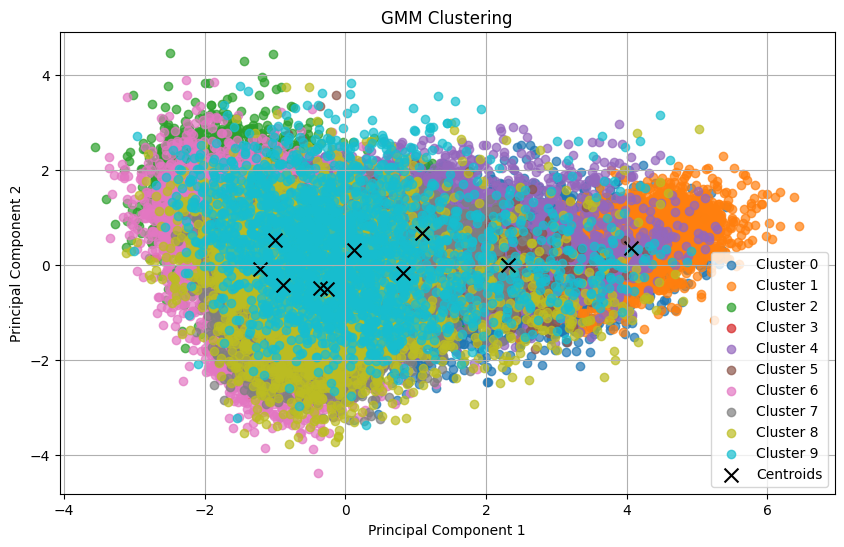

In [62]:

#numeric_features = merged_dataset.select_dtypes(include=['float64']).columns.tolist()
numeric_features = lessNaNs.select_dtypes(include=['float64']).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), 
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

#X_processed = preprocessor.fit_transform(merged_dataset)
X_processed = preprocessor.fit_transform(lessNaNs)

n_components = 10 
gmm = GaussianMixture(n_components=n_components, random_state=42)
gmm.fit(X_processed)

cluster_labels = gmm.predict(X_processed)

#merged_dataset['cluster_label'] = cluster_labels
lessNaNs['cluster_label'] = cluster_labels

#print(merged_dataset['cluster_label'].value_counts())
print(lessNaNs['cluster_label'].value_counts())
print(lessNaNs['Genre'].value_counts())

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_processed)

plt.figure(figsize=(10, 6))
for cluster_label in range(n_components):
    plt.scatter(X_reduced[cluster_labels == cluster_label, 0],
                X_reduced[cluster_labels == cluster_label, 1],
                label=f'Cluster {cluster_label}', alpha=0.7)


centroids = pca.transform(gmm.means_)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='black', s=100, label='Centroids')
plt.title('GMM Clustering')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.show()

# Footnotes
1. <a name="cite_note-1"></a> [^](#cite_ref-1) Chillar, Snigdha et al. (May 2019) Music Genre Classification using Machine Learning Algorithms: A comparison. *International Research Journal of Engineering and Technology (IRJET)*. https://d1wqtxts1xzle7.cloudfront.net/59934287/IRJET-V6I517420190704-120568-1u4iafr-libre.pdf?1562308085=&response-content-disposition=inline%3B+filename%3DIRJET_Music_Genre_Classification_using_M.pdf&Expires=1708407619&Signature=WRJ6JnCTvv8fyWmo~A-SzVQ2DRT77pSZFX8tmlz7YCCB7J5ZMkrJpugkiwlJT7DoaCR-d2jI6IfGjgYXI9-EsJlVANQ~gJY04gUz9H4zkZG-HiyimSeXcAkK58Rqp06qgvlu-yx5zcM1wNxrnhgASBQEvVBkhyQMxETbkgtLYzw40gKVZFeioo0Qjj7aqC-YDzGwlzlnXhNss4xlBsBj7PdyTFgGu2cM8ky8g3XsqA1yIIuiO4cr0SEcCJU8orRATVTpB388Nud0GvNiGOz6DAhpoCBLEqrsYxFHk2jOut7x1TPs91ECXgG1SwjPE03vlYoeAMEkdV5pasBm1yZDeQ__&Key-Pair-Id=APKAJLOHF5GGSLRBV4ZA

2. <a name="cite_note-2"></a> [^](#cite_ref-2) Bahuleyan, Hareesh( 3 April 2018) Music Genre Classification using Machine Learning Techniques. Cornell University. https://doi.org/10.48550/arXiv.1804.01149

3. <a name="cite_note-3"></a> [^](#cite_ref-3) Wohlwend, Brandon (23 July 2023) Decision Tree, Random Forest, and XGBoost: An Exploration into the Heart of Machine Learning. Medium. https://medium.com/@brandon93.w/decision-tree-random-forest-and-xgboost-an-exploration-into-the-heart-of-machine-learning-90dc212f4948#:~:text=Random%20Forests%20build%20on%20this,that%20often%20outperforms%20many%20others.
